In [1]:
# imports for exploratory dataframe manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imports for exploratory data analysis
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
import os
import cv2
from sklearn.model_selection import train_test_split

In [3]:
def get_img_paths(base_dir, ignore_filetypes=['.txt', '.cpp', '.gif']):
    """
    Inputs:
        base_dir (string/ os.path type) relative path to the directory with folders containing images
        *kwargs
        ignore_filetypes (list of strings) filetypes to exclude from output
        type_foldes (dictionary) folders that identify different filetypes and add identifiers to add to output
    Returns:
        paths (list of tuples) relative paths to files with identifiers
    """
    absent_paths = []
    present_paths = []

    for root, dirs, files in os.walk(base_dir):
        #not removing undesired files
#         # remove undesired files
#         for file in files:
#             for file_type in ignore_filetypes:
#                 if file_type == file[-4:]:
#                     files.remove(file)
                    
        if files:
        
            for file in files:
                full_path = os.path.join(root, file)
                
                if 'NO' in full_path:
                    absent_paths.append((full_path, 0))

                elif 'YES' in full_path:
                    present_paths.append((full_path, 1))

    #         if type_folders:
    #             for key, value in type_folders.items():
    #                 if key in root:

    #         print('root: ', root)
    #         print('files: ', files[:5], len(files))
    #         print('paths: ', paths)
#     absent_paths.extend(present_paths)
    return absent_paths, present_paths

In [4]:
def get_data(input_data, img_size=150):
    """
    This function takes an image type and classification with matching index and returns  image data with classification

    Input:
        input_data (list of tuples) paths leading to image data to be loaded and classification

    Returns:
        data (np.array) image data with classification
    """

    data = []

    for i in range(len(input_data)):
        path = input_data[i][0]
        class_num = input_data[i][1]

        #         for img in os.listdir(path):

        try:
            img_arr = cv2.imread(path)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
            data.append([resized_arr, class_num, path])

        except Exception as e:
            print(f'{e} on path {path}')

    return np.array(data)

## Use pillow to compare images

## Remove Duplicate Images

In [5]:
def remove_duplicates(data):
    '''
    function takes a list of entries and returns a list of all unique entries
    '''

    unique_list = []
    duplicate_list = []
    # loop through original images
    for image in data:
        img = image[0]
        
        is_unique = True
        
        # loop through new list
        for unique_image in unique_list:
            unique_img = unique_image[0]
            
            # check existing entries to new entry
            if (img == unique_img).all():
                is_unique = False
                print(f'duplicate found:{img[0][25:26]} and {unique_img[0][25:26]}')
                break
                
        # add to unique list if unique
        if is_unique:
            unique_list.append(image)
#             print('appended')
        
        else:
            duplicate_list.append(image)
            
    return np.array(unique_list), np.array(duplicate_list)

# Get paths to additional image files 
## (updated)

In [6]:
# imports from kaggle example https://www.kaggle.com/kmader/show-3d-nifti-images
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import skimage
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing, binary_dilation, binary_opening
from skimage.measure import label,regionprops, perimeter
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
from glob import glob
from skimage.io import imread

# Create .gif from fdata

## Define Functions

### Define function to create list of folder names within a given directory

In [7]:
def get_dir_folders(directory):
    '''
    Input: list-like directory containing the folder names / file names within a given parent folder
    Returns: list clean_directory containing only folder names within the parent folder
    '''
    # create list copy of directory
    clean_directory = list(directory)
    
    # iterate through directory
    for name in directory:
        
        # remove all names with file extensions
        print('path: ', name)
        
        filename = name.split('/')[-1]
        
        if '.' in filename:
            print(f'remove {name} from list')
            directory.remove(name)
            
    return clean_directory
            
#         # remove all names with file extensions
#         print('path: ', name)
#         print('name[-4]', name[-4])
#         if '.' == name[-4]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif '.' in name[-6:]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'txt' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'tar' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            


### Define function to load image file(s) given folder path

In [8]:
# def get_gz_img_paths(parent_folder, in_name='*'):

#     return glob(os.path.join([folder for folder in image_folder if in_name in folder][0], '*'))


### Define function to create .gif given image data

In [55]:
# define function to create gif from image data
def create_gif(input_image, title='Scan .gif', filename='scan.gif'):
    # create .gif-like https://matplotlib.org/gallery/animation/dynamic_image2.html
    import imageio
    import matplotlib.animation as animate

    images = []
    input_image_data = input_image.get_fdata()

    fig = plt.figure()

    for i in range(len(input_image_data)):
        im = plt.imshow(input_image_data[i], animated=True)
        images.append([im])
    
    ani = animate.ArtistAnimation(fig, images, interval=25, blit=True, repeat_delay=500)
    plt.title(title, fontsize=20)
    plt.axis('off')
    ani.save(filename, transparent=True)
    plt.show()

## Load Brain Development Data Paths (Healthy Brains)

In [10]:
# get paths to data
# base path for data sourced from brain-development.org
bd_base_path = os.path.join('D:\MRI_data\BrainDevelopmentOrg')


In [11]:
bd_directory = glob(os.path.join(bd_base_path, '*'))

In [12]:
# get list of all folders in directory
# get copy of full directory
bd_image_folders = get_dir_folders(bd_directory)
bd_image_folders

path:  D:\MRI_data\BrainDevelopmentOrg\Demographics
path:  D:\MRI_data\BrainDevelopmentOrg\DTI_images
path:  D:\MRI_data\BrainDevelopmentOrg\DTI_jpg
path:  D:\MRI_data\BrainDevelopmentOrg\IXI-MRA.tar
remove D:\MRI_data\BrainDevelopmentOrg\IXI-MRA.tar from list
path:  D:\MRI_data\BrainDevelopmentOrg\IXI-T1.tar
remove D:\MRI_data\BrainDevelopmentOrg\IXI-T1.tar from list
path:  D:\MRI_data\BrainDevelopmentOrg\MRA_images
path:  D:\MRI_data\BrainDevelopmentOrg\MRA_jpg
path:  D:\MRI_data\BrainDevelopmentOrg\PD_images
path:  D:\MRI_data\BrainDevelopmentOrg\PD_jpg
path:  D:\MRI_data\BrainDevelopmentOrg\REAME_BrainDev.txt
remove D:\MRI_data\BrainDevelopmentOrg\REAME_BrainDev.txt from list
path:  D:\MRI_data\BrainDevelopmentOrg\T1_jpg
path:  D:\MRI_data\BrainDevelopmentOrg\T2_images
path:  D:\MRI_data\BrainDevelopmentOrg\T2_jpg


['D:\\MRI_data\\BrainDevelopmentOrg\\Demographics',
 'D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\DTI_jpg',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-MRA.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-PD.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T1.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T2.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_jpg',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_jpg',
 'D:\\MRI_data\\BrainDevelopmentOrg\\REAME_BrainDev.txt',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_jpg',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_jpg']

In [13]:
bd_image_folders = [folder for folder in bd_image_folders if 'image' in folder]
bd_image_folders

['D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images']

## Get Paths to Various Scan Types

### Get T1 Path

In [14]:
bd_image_files_T1 = glob(os.path.join([folder for folder in bd_image_folders if 'T1_im' in folder][0], '*'))
print(len(bd_image_files_T1))
bd_image_files_T1[:5]

581


['D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI002-Guys-0828-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI012-HH-1211-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI013-HH-1212-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI014-HH-1236-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI015-HH-1258-T1.nii.gz']

In [15]:
# use regular expressions
# import
import re

In [16]:
pattern = r'\w+\d+\-\w+\-\d+'
re.findall(pattern, bd_image_files_T1[0])

['IXI002-Guys-0828']

In [17]:
pattern = r'\w+\d+\-\w+\-\d+'
re.findall(pattern, bd_image_files_T1[1])

['IXI012-HH-1211']

NameError: name 'T1' is not defined

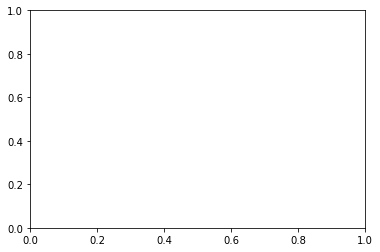

In [18]:
fig, ax = plt.subplots()
ax.imshow(T1[80][256:106:-1], cmap='Greys_r')
ax.axis('off')
plt.savefig('figures/test.jpg')

### Get T2 Path

In [24]:
bd_image_files_T2 = glob(os.path.join(str([folder for folder in bd_image_folders if 'T2_im' in folder][0]), '*'))
print(len(bd_image_files_T2))
bd_image_files_T2[:5]

578


['D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI002-Guys-0828-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI012-HH-1211-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI013-HH-1212-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI014-HH-1236-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI015-HH-1258-T2.nii.gz']

### Get MRA Path

In [25]:
bd_image_files_MRA = glob(os.path.join(str([folder for folder in bd_image_folders if 'MRA_im' in folder][0]), '*'))
print(len(bd_image_files_MRA))
bd_image_files_MRA[:5]

570


['D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI002-Guys-0828-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI012-HH-1211-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI013-HH-1212-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI015-HH-1258-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI016-Guys-0697-MRA.nii.gz']

### Get PD Path

In [26]:
bd_image_files_PD = glob(os.path.join(str([folder for folder in bd_image_folders if 'PD_im' in folder][0]), '*'))
print(len(bd_image_files_PD))
bd_image_files_PD[:5]

578


['D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI002-Guys-0828-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI012-HH-1211-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI013-HH-1212-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI014-HH-1236-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI015-HH-1258-PD.nii.gz']

## Load Image Data From File

In [27]:
import nibabel as nib
from nibabel import gifti as gi

### Load a T1 Image

In [28]:
img_T1 = nib.load(bd_image_files_T1[17])
img_T1

In [29]:
img_T1.get_fdata().shape

(256, 256, 150)

In [30]:
T1 = np.array(img_T1.dataobj)
T1[25]

array([[278, 251, 231, ..., 260, 262, 223],
       [262, 260, 273, ..., 279, 272, 255],
       [262, 247, 271, ..., 330, 267, 291],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int16)

In [31]:
t1gi = gi.GiftiDataArray(data=T1)
t1gi

In [32]:
t1gi.metadata

{}

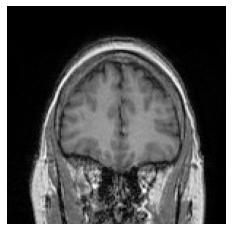

In [40]:
fig, ax = plt.subplots()
ax.imshow(T1[80][256:106:-1], cmap='Greys_r')
ax.axis('off')
plt.savefig('../figures/test.jpg')

In [ ]:
img_T1 = nib.load(bd_image_files_T1[17])
img_T1 = img_T1.get_fdata()[80]

In [ ]:
test_img = get_data([('figures/test.jpg', 0)])
test_img[0][0].any()

In [ ]:
test_img[0][0][0]

In [ ]:
test_img.shape

In [ ]:
test_img[0][2]

In [ ]:
# plot image data from first [1] train image data (tumor-free brain)
plt.figure(figsize=(5,5))
plt.imshow(test_img[0][0][56:])

plt.axis('off')


### Load a T2 Image

In [36]:
# load specified image
img_T2 = nib.load(bd_image_files_T2[17])
img_T2

In [37]:
img_T2.shape

(256, 256, 130)

In [38]:
img_T2.get_fdata().shape

(256, 256, 130)

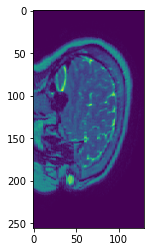

In [39]:
T2_image = img_T2.get_fdata()
# test_mask = 
fig, ax = plt.subplots()
ax.imshow(T2_image[80]//2)

### Load an MRA image

In [35]:
img_MRA = nib.load(bd_image_files_MRA[17])
img_MRA

In [41]:
img_MRA.get_fdata().shape

(512, 512, 100)

### Load a PD IMAGE

In [42]:
img_PD = nib.load(bd_image_files_PD[17])
img_PD

In [43]:
img_PD.get_fdata().shape

(256, 256, 130)

## Create Images for EDA/ understanding Data

#### Create T1 image

MovieWriter ffmpeg unavailable; using Pillow instead.


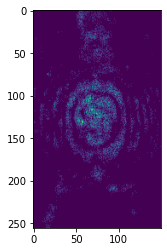

In [49]:
create_gif(nib.load(bd_image_files_T1[0]), title=None, filename="T1_MRI.gif")

TypeError: save() got an unexpected keyword argument 'transparent'

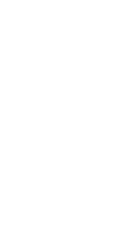

In [57]:
create_gif(img_T2, title=None, filename='T2_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


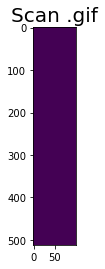

In [47]:
create_gif(img_MRA, title='MRA Scan .gif', filename='MRA_MRI.gif')

TypeError: save() got an unexpected keyword argument 'transparent'

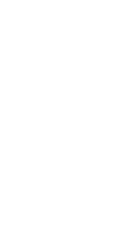

In [56]:
create_gif(img_PD, title=None, filename='PD_MRI.gif')